In [48]:
# Gradient Descent have no specific library . you just have to use function and loops to derive this concept . 
# basically it is the concept where you calculate the MSE(mean squared error) and adding some penality factors
# to get desired output.
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
sales_df=pd.read_csv('Advertising.csv')
sales_df.head()

,TV,Radio,Newspaper,Sales,Unnamed: 4,TV^2,tv.radio,tv.news,radio^2,radio.news,news^2
0,230.1,37.8,69.2,22.1,NaN,"52,946","8,698","15,923","1,429","2,616","4,789"
1,44.5,39.3,45.1,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.2,45.9,69.3,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,151.5,41.3,58.5,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,180.8,10.8,58.4,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# defing X and y

In [50]:
X=sales_df[['TV','Radio','Newspaper']]
y=sales_df['Sales']

# Standardizing the value , means we take the Y value and Convert it into Normal distribution kind of values ..Like calculating its Z-Score(x-x.mean())/x.std(). So now X will have standardized data as Z-score.
It will be better for gradient descent algorithm if value be in small range

In [51]:
# Because of Standardisation the data will be better for Gradient Descent algorithm if the values are in small range.
# for X feature it has several column so, .apply will or can be used to be standardize each column data at a time.
X=X.apply(lambda rec: (rec -rec.mean())/rec.std(),axis=1)
y=np.array((y-y.mean())/y.std())

In [52]:
X

,TV,Radio,Newspaper
0,1.141250,-0.722813,-0.418437
1,0.480734,-1.149582,0.668847
2,-1.032131,0.067702,0.964429
3,1.142487,-0.716303,-0.426184
4,1.111367,-0.827064,-0.284303
...,...,...,...
195,1.106910,-0.838170,-0.268741
196,1.154124,-0.608646,-0.545478
197,1.154573,-0.562441,-0.592133
198,1.149916,-0.665899,-0.484017


In [53]:
# Step 1 ---- As per the Concept of Gradient Descent, Here we are initialising Bias and Weight with random Number . 
# there is no calculation in this block . we are just intialising the bias and weight
# as we know bias is constant and here w(X Features) has three column so w will store 3 random number
# as you can see we have passed 3 as an argument to calculate..

import random
#dim is the number of weights(each data of X Features) to be initialised besides the bias
# here we are doing for both B0 and B1

def initialize(dim):
    #for reproducable result the seed is set to 42
    np.random.seed(seed=42)
    random.seed(42)
    #initialize the bias
    # b will have one random value 
    b=random.random()
    #initialize the weights
    # w has dim no. of value when the function called with value
    w=np.random.rand(dim)
    return (b,w)
# b is the bias which is constant for every value of X feature. it is B0
# w represents the each weight(each data) it is B1

    

In [54]:
# here we are calling that function to get bias and weight value
b,w=initialize(3)
print('Bias:',b,'Weight:',w)

Bias: 0.6394267984578837 Weight: [0.37454012 0.95071431 0.73199394]


In [55]:
# Step 2 ---here we are performing the step 2 which is predict the Y_hat As per concept of gradient Descent
# here we are performing predict using linear regression formula(B0+B1.X)
#bias- b
#weight- w
#X- the input matrix
def predict_y(b,w,X):
    return b + np.dot(X,w)
# here we are using dot matrix . in return the same formula use as linear reg. i.e, B0(b)+B1(w).X(input matrix)
#y_hat=B0+B1X

In [56]:
# here we are caling the predict function to see the predicted values
b,w=initialize(3)
y_hat=predict_y(b,w,X)
y_hat[0:10]
# below are the predict value from 0 to 10 count.   

array([0.07338863, 0.21614965, 1.02317352, 0.07437026, 0.06126864,
       1.05014616, 0.17749303, 0.11603025, 0.13453933, 0.08368457])

In [57]:
# Step 3------ calculating MSE As per concept of gradient Descent
# we can import library and use that but instead we are doing manually calculation 
import math
#inputs
# Y - Actual value of y
# y_hat- predict value of Y.
def get_cost(Y,Y_hat):
    #calculating the residuals- difference between actual and predicted value
    Y_resid= Y-Y_hat
    # matrix multiplication with self will give the squared value
    # then take the sum and divide the number of example to 
    # calculate the mean
    # here .T is transpose matrix , term of matrix.
    return np.sum(np.dot(Y_resid.T, Y_resid) ) / len(Y_resid)

In [58]:
b, w = initialize(3)
y_hat = predict_y(b, w, X)
# here we are giving the actual y and the predicted y_hat values
get_cost(y, y_hat)

1.3522983207444292

In [59]:
# Step 4-----Adjusting the B1 and B0
# Now for Adjusting the MSE to reach Its minimal value , This update_beta function will increase the step size
def update_beta(X, y, y_hat, b_0, w_0, learning_rate ):
    #gradient of bias or can say Doe B0
    db = (np.sum(y_hat - y) * 2) / len(y) # partial diff w.r.t B0. This is nothing but slope
    #gradient of weights ( as X have 3 features so we have to multiply with dot product)
    dw = (np.dot((y_hat - y), X) * 2 ) / len(y) # partial diff wrt B1
    
    #here we are updating Step size update bias
    b_1 = b_0 - learning_rate * db
    #update beta
    w_1 = w_0 - learning_rate * dw
    #return the new bias and beta values
    return b_1, w_1

In [60]:
b, w = initialize(3)
print('After Initialization - Bias:', b, 'Weights: ', w )
y_hat = predict_y( b, w, X)
# below passing the parameter value as per its occurance in function. learning rate is 0.01
b, w = update_beta(X, y, y_hat, b, w, 0.01)
print('After first update - Bias:', b, 'Weights: ', w)
# Now as per the Output we are getting reduced gradient value which makes closer to gradient level 0.

After Initialization - Bias: 0.6394267984578837 Weights:  [0.37454012 0.95071431 0.73199394]
After first update - Bias: 0.6354976177507318 Weights:  [0.37964358 0.94925831 0.72834648]


In [61]:
# Now Model is ready but to reach at its minimal point all the process have to keep repeated until step size is 0. 
# so for iteration this function is made which will terminate when the previous and current data will be same.
def run_gradient_descent(X, y, alpha = 0.01, num_iterations = 100):
    
    # Initialize the bias and weights
    
    b, w = initialize(X.shape[1])
    
    # gd_iterations_df keeps track of the cost every 10 iterations
   
    iter_num = 0
      
    gd_iterations_df = pd.DataFrame(columns = ['iteration', 'cost'])
    
    result_idx = 0
    
    # Run the iterations in loop
    
    for each_iter in range(num_iterations):
   
        # Calculate predicted value of y
    
        y_hat = predict_y(b, w, X)
    
        # Calculate the cost
    
        this_cost = get_cost(y, y_hat)
    
        # Save the previous bias and weights
    
        prev_b = b
        prev_w = w
    
        # Update and calculate the new values of bias and weights
    
        b, w = update_beta(X, y, y_hat, prev_b, prev_w, alpha)
    
        # For every 10 iterations, store the cost i.e. MSE
    
        if(iter_num % 10 == 0):
            
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            
            result_idx += 1
        
        iter_num += 1
       
    print('Final estimate of b and w: ', b, w)
    
    #return the final bias, weights and the cost at the end
    return gd_iterations_df, b, w

In [62]:
# learning parameter - 0.01
gd_iterations_df1, b, w =  run_gradient_descent(X, y, alpha = 0.01, num_iterations = 10000)

Final estimate of b and w:  -0.8010818284444251 [1.2818374  0.49240327 0.2830077 ]


In [63]:
gd_iterations_df1.iloc[500]

iteration    5000.000000
cost            0.722532
Name: 500, dtype: float64

(0.0, 200.0)

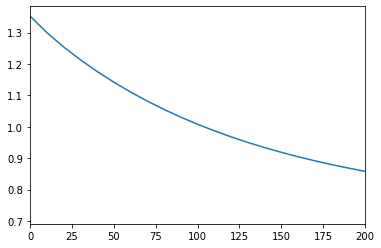

In [64]:
plt.plot(gd_iterations_df1['iteration'], gd_iterations_df1['cost'])
plt.xlim(0,200)

In [65]:
# learning parameter - 0.001
gd_iterations_df2, b, w =  run_gradient_descent(X, y, alpha = 0.001, num_iterations = 10000)

Final estimate of b and w:  -0.7561490125459945 [1.25639155 0.52178817 0.27906865]


(0.0, 800.0)

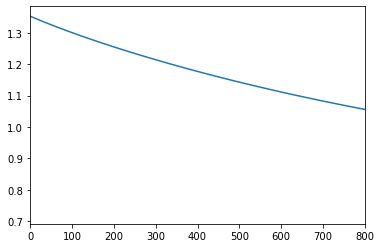

In [66]:
plt.plot(gd_iterations_df2['iteration'], gd_iterations_df2['cost'])
plt.xlim(0,800)

In [ ]:
######################--New Program of gradient Descent--##############################################################################

In [67]:
data=pd.read_excel('Folds5x2_pp.xlsx')
data.head()

,Ambient Temparature,Vaccum,Ambient Pressure,Relative Humidity,Per hour Electricity
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [75]:
X=data[['Ambient Temparature','Vaccum','Ambient Pressure','Relative Humidity']]
y=data['Per hour Electricity']

In [76]:
X.shape

(9568, 4)

In [77]:
y.shape

(9568,)

In [78]:
#standardizing the x and y as like normal distribution or z score.
X = X.apply(lambda rec: (rec - rec.mean())/rec.std(), axis= 0)
y = np.array((y - y.mean())/y.std())

In [79]:
X

,Ambient Temparature,Vaccum,Ambient Pressure,Relative Humidity
0,-0.629486,-0.987245,1.820393,-0.009519
1,0.741870,0.681010,1.141803,-0.974570
2,-1.951195,-1.172956,-0.185068,1.289772
3,0.162197,0.237191,-0.508366,0.228148
4,-1.185007,-1.322470,-0.678435,1.596616
...,...,...,...,...
9563,-0.402716,-0.363223,0.126444,1.211692
9564,-0.866992,-1.190268,1.753039,-0.447182
9565,1.565758,1.575729,-0.057096,-2.522486
9566,0.647942,1.191716,0.101186,-0.747861
